# Visualizing Sports Data

Last week we introduced some simple ways to graph data. This week we introduce some more applications of visualization methods in Python. There are entire courses on data visualization methods in Python or R, so here we will only skim the surface. Our object is to show how powerful graphs can be as tools for understanding sports data.

As a general rule, any data analysis should start with drawing some graphs. Literally *looking* at the relationship between variables in your data can help you in a number of different ways, including:

1. Identifying the correlation between variables
2. Identifying particular ranges of values where the relationship might change
3. Identifying outliers which may not conform to a typical pattern

In essence, all data analysis is about looking for patterns, and using a visual representation is an especially good way for humans to recognize patterns.

During this week we will look at data from four different sports: baseball, basketball, hockey, but first, cricket.

## Cricket

Cricket is a sport which originated in England several hundred years ago- records of games date back over three hundred years. It is the most popular game in India, Pakistan, Bangladesh and Sri Lanka - home to almost one quarter of the world's population. It is also a popular sport in Australia, New Zealand, South Africa, Zimbabwe, and the islands of the Caribbean. 

It is a bat and ball game that bears some resemblance to baseball: a ball is thrown by a player (called the bowler in cricket) on one team at a player (called the batsman) on the other team, who attempts to hit it in order to score runs. (Note: although women's cricket is popular and has a long history, the term "batsman" is used for men and women alike). A batsman is "out" if he hits the ball and it is caught on the fly, and is also "out" if the ball hits the "wicket", which is a little like the strike-zone in baseball, except that the wicket is a physical object comprising three sticks planted vertically (the "stumps") with two smaller sticks resting on top (the "bails"). Unlike baseball, a player does not get three strikes before being out- if the wicket is hit and a bail dislodged, the batsman is out. 

Runs are also simpler in cricket- to complete a run a batsman has to be able to reach the "crease" at the "other end", which refers to the place from which the bowler delivered the ball, and where there stands another wicket (stumps and bails). At that other end stands another batsman- there are always two at any one time - and that batsman must also run to the opposite crease for the run to be complete. If any fielder can dislodge a bail at the end to which a batsman is running before the batsman reaches the crease then no run is scored and, more importantly, the batsman is out (this, again, is similar to baseball). 

To score runs the batsman needs to hit the ball to locations which are not close to fielders, to give the batsmen time to complete a run. Depending on where the ball is hit, the batsmen may have time to complete one, two runs, or even three. The game is played on an oval shaped field, and if the ball reaches the designated boundary of the field, four runs are scored, unless the ball crosses the boundary without hitting the ground (like a home run) in which case six runs are awarded.

Two important differences between baseball and cricket are that (a) there are fewer outs in a game and (b) many more runs are typically scored. A game of cricket is typically played with one or two innings per team. We are going to look at data from the Indian Premier League, which is played under the "Twenty20" (T20) rules, in which each team gets only one inning. So each player may bat only once. There are 11 players on each team, and once ten batsmen are "out", the innings is over. 

The higher rate of scoring runs arises because (i) the bat in cricket is larger, and hence hitting the ball is easier (the ball is of similar size, and the distance between bowler and batsman is roughly the same as between pitcher and batter in baseball- the speed of delivery is tyically a bit faster in baseball) (ii) there is no obligation to run when the ball is hit, and there is no rule of three strikes and out - so that a player may stand and bat without attmempting to score runs.

T20 cricket was invented in the early 2000s, and is a game played at a fast pace over short period of time (contrary to the popular perception of cricket). In a T20 game each side faces a maximum of 120 balls, and the game is usually completed within three hours (if ten batsmen are out before 120 balls have been bowled, then the innings is over).

The team with the highest runs score wins. Statistically speaking, one other critical difference from baseball is that if the team batting second wins, there is no way of knowing how may runs that team could have scored in a completed inning- it is sufficient to outscore the team batting first for the game to be over. You will recall from week 1 that the Pythagorean expectation model fitted the cricket data poorly - and this may be in part due to the fact that the maximum potential score of the team in such cases is unknown.

## The Indian Premier League

The Indian Premier League (IPL) was founded in 2008 and is the most popular cricket competition in world, and the value of braodcasting rights is estimated to be over $1 billion. The league currently consists of eight franchises based in Indian cities, and the league typically plays over seven weeks in April and May, with every team playing every other team home and away, followed by playoffs involving the top four teams. The season consists of 60 games in total.

Most of the world's best players are recruited for the IPL. Each season there is a player auction, and teams are subject to a salary cap.

## The Run Chase

The order in which teams bat is decided by the toss of a coin at the start of the game. Teams generally elect to field first (over 80% of the time in our data). Batting with the knowledge of the total you need to reach, having seen the batting conditions (the weather can play a significant role) is a big advantage. There is a fundamental trade-off between batting aggressively, (allowing you to score runs quickly) and batting conservatively (which means that "outs" are less likely). The ten wickets (outs) allowed for each team essentially represent resources at the batting team's commands. However, as in baseball, the bowlers tend to be less skilled in batting, and the better batsmen typically play at the top of the innings. 

Batting is typically hardest at the beginning of an innings, because the bowlers are freshest and the ball is new (unlike baseball, the same ball is used throughout a whole inning). However, there are also fielding restrictions, known as powerplays, which make it easier to make big hits safely, especially during the first ten overs of the game.

From all this, it should be clear that managing the pace of an innings is a crucial team skill in cricket. We are going to use the IPL data to compare visually the run/wicket profiles of teams in each game.

## Plan for this session

Runs scored determine the outcome of the game, so we will begin by looking at runs totals for each game from the IPL 2018 season and generating charts to show variations in runs scored depending on (a) which team batted first and (b) which team won the game.

We then turn to a particular game - first game of the 2018 season between the Mumbai Indians and the Chennai Super Kings, and compare the progress of each team in terms of runs scored and wickets lost. 

Finally, we write a program to compare teams in any game.

## Starting

As ever we begin by importing the packages we need, and loading up the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
IPL2018 = pd.read_excel('D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week3\\IPL2018_results.xlsx')
pd.set_option('display.max_columns', 50)
#display(IPL2018)

We can use the **"print(filename.tolist())"** command to see the names of the variables in our data

In [3]:
print(IPL2018.columns.tolist())

['scorecard_id', 'start_date', 'phase', 'stadium_name', 'home_team', 'away_team', 'toss_winner', 'toss_decision', 'innings1', 'wickets1', 'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2', 'adjusted_target_indicator', 'adjusted_target', 'team1_overs', 'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status', 'result_type', 'result_margin', 'winning_team']


## The distribution of runs scored

The variables we are interested in are the runs scored by each team, which are listed in "innings1" and "innings2". A histogram will show us the variation of runs scored. We specify the number of 'bins' - we use 10 bins here, which divides the data between the highest and lowest scores into ten equals ranges of 20 runs. The vertical axis then tells us the percentage of scores in innings1 in each data range.

array([[<AxesSubplot:title={'center':'innings1'}>]], dtype=object)

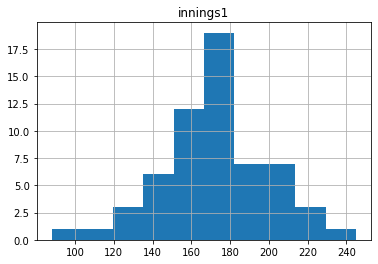

In [4]:
IPL2018.hist(column='innings1', bins=10)

## Self test

Compare the charts you produce when you specify (a) 5 bins and (b) 20 bins. Which do you think is better representation of the data and why?

array([[<AxesSubplot:title={'center':'innings2'}>]], dtype=object)

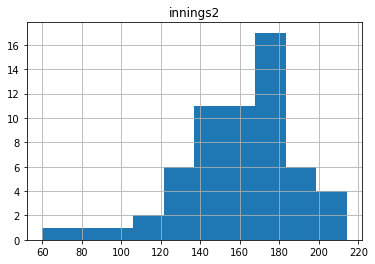

In [5]:
# now we generate the graph for innings2

IPL2018.hist(column='innings2', bins=10)

Comparing these two graphs it looks as if the scores in innings1 are skewed slightly to the left, and in innings2 slightly to the right. This could tell us something, but we should be careful. The x-axis for innings1 runs from 80 to 240, while for innings2 runs from 60 to 220. To compare, we really should specify that the x-axis has the same range for both sets of data. We do that in the next line:

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

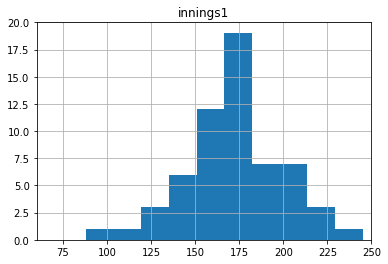

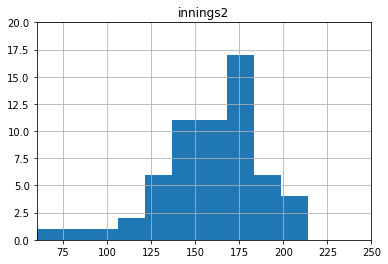

In [6]:
IPL2018.hist(column='innings1', bins=10)
plt.xlim((60, 250))
plt.ylim((0, 20))
IPL2018.hist(column='innings2', bins=10)
plt.xlim((60, 250))
plt.ylim((0, 20))
plt.plot

We can now see that the two innings have quite similar distributions centered around roughly the same median score. The two main differences are that the scores for innings2 seem truncated around the 200-215 mark. That is probably a result of the run chase effect - teams batting second either reach the required target and stop, or the target set in the first place was so high that the team batting second collapsed with a very low score. 

(0.0, 20.0)

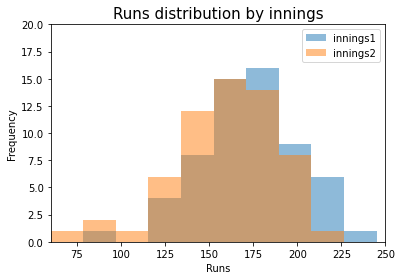

In [7]:
# We can show the two distributions on the same histogram.
# note that in addition to specifying the number of bins, we also specify alpha, which is the degree of transparency.

IPL2018[['innings1','innings2']].plot.hist(alpha=.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Runs distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

## Self test

Try experimenting with different values of alpha to see how this changes the the visual effectiveness of the histogram.

## The distribution of runs scored by winning and losing teams

Having looked at the distributions comparing the team batting first and second, now let's compare the histograms for the teams that win and the teams that lose.

First, define winning and losing teams - which is derived by comparing the number of runs scored.

In [8]:
IPL2018['winscore']= np.where(IPL2018['innings1']>IPL2018['innings2'],IPL2018['innings1'],IPL2018['innings2'])
IPL2018['losescore'] = np.where(IPL2018['innings1']>IPL2018['innings2'],IPL2018['innings2'],IPL2018['innings1'])

(0.0, 20.0)

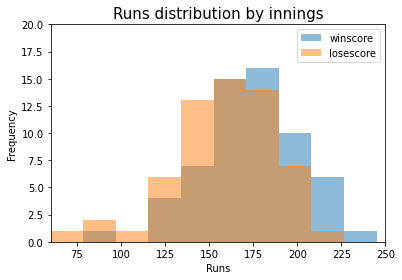

In [9]:
# Now we can plot two histograms together

IPL2018[['winscore','losescore']].plot.hist(alpha=.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Runs distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

We can see that the winning score appears like a rightward shift of the losing score- which should not be surprising! For a low score, losing scores must outnumber winning scores, while for high scores, winning scores must outnumber losing scores. 

## Run Accumulation and Wickets

We now look at a particular game, the opening game of the 2018 season between the Mumbai Indians (the reigning champions) and Chennai Super Kings, played in Mumbai on April 7, 2018. The file we now load contains a record of the game, ball by ball.

In [11]:
MI_CSK = pd.read_excel('D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week3\\MIvCSKadj.xlsx')
print(MI_CSK.columns.tolist())
MI_CSK

['MI_over_no', 'MI_ball_no', 'MI_runs_total_end', 'MI_delivery_no', 'MI_wicket', 'CSK_over_no', 'CSK_ball_no', 'CSK_runs_total_end', 'CSK_delivery_no', 'CSK_wicket']


,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
0,0.0,1.0,0.0,1.0,0.0,0,1,0,1,0
1,0.0,2.0,0.0,2.0,0.0,0,2,1,2,0
2,0.0,3.0,0.0,3.0,0.0,0,3,2,3,0
3,0.0,4.0,4.0,4.0,0.0,0,4,3,4,0
4,0.0,5.0,5.0,5.0,0.0,0,5,3,5,0
...,...,...,...,...,...,...,...,...,...,...
119,19.0,4.0,162.0,120.0,0.0,19,1,159,120,0
120,19.0,5.0,164.0,121.0,0.0,19,2,159,121,0
121,19.0,6.0,165.0,122.0,0.0,19,3,159,122,0
122,NaN,NaN,NaN,NaN,NaN,19,4,165,123,0


Bowling in cricket alternates between each end of the batting strip (also, confusingly, called the "wicket"). Thus one bowler delivers six consecutive balls from one end, and then another bowler delivers six consecutive balls from the other end. Each batch of six balls ("deliveries") is called an "over". Hence a Twenty20 game refers to 20 over, equal to 120 deliveries. In the dataframe "ball_no" refers to the ball of the over in question, which is referred to by "over_no". "delivery_no" refers to its position in the inning as a whole. You can see that, in fact, there were 122 deliveries in the Mumbai innings, while there were 124 deliveries in the Chennai innings, despite only 19.5 overs being completed (Chennai won, i.e. surpassed the Mumbai score, with one ball to spare). This arises because some balls delivered do not count- these could be either "wides" - called when the umpire decides that the ball was delivered so far away from the batsman that he had no reasonable chance of hitting it - or "no balls", called when the bowler released the ball too close to the batsman (there is a line which the bowler must not overstep).

Runs_total_end refers to the number of runs scored by each team by the completion of a given delivery number. So we can now draw a linechart plotting the runs against delivery number for Mumbai, the team which batted first:

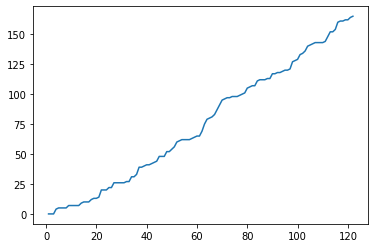

In [12]:
plt.plot(MI_CSK['MI_delivery_no'],MI_CSK['MI_runs_total_end'])

We can see from this chart that Mumbai maintained a steady pace throughout the inning - the score increases more or less linearly with the number of balls.

The next thing we want to do is incorporate the fall of wickets into the chart, to see how their batting resources changed as the inning progressed.

The "wicket" columns for each team tell us if a wicket fell on that delivery ('1') or not ('0'). We can create dfs as subsets of main df, to identify the delivery number and runs scored when the wicket fell.

In [13]:
MIwicket = MI_CSK[MI_CSK['MI_wicket']>0]
CSKwicket = MI_CSK[MI_CSK['CSK_wicket']>0]
MIwicket

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
12,2.0,1.0,7.0,13.0,1.0,2,1,16,13,0
23,3.0,6.0,20.0,24.0,1.0,3,6,31,24,0
75,12.0,3.0,98.0,76.0,1.0,12,2,76,76,0
88,14.0,4.0,113.0,89.0,1.0,14,3,103,89,0


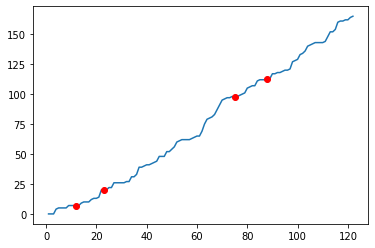

In [14]:
# We can now plot the fall of wickets alongside the runs total 
# note that we obtain the red dots for wickets by specifying 'ro' - 'r' for red and 'o' for circle dots

plt.plot(MI_CSK['MI_delivery_no'],MI_CSK['MI_runs_total_end'],MIwicket['MI_runs_total_end'], 'ro')

We can see from this that Mumbai made a realtively slow start, and lost two wickets early on. After that the innings stabilized, and then acclerated rapidly in the middle, only to slow down again after two more wickets fell. Some acceleration is also visible at the end of the innings.

##  Self test

Try using 'ro' as the marker for the runs scored. Based on this you can consider other types of colors and/or markers for each variable. You can find options for markers in matplotlib here: https://matplotlib.org/3.1.1/api/markers_api.html and for colors here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

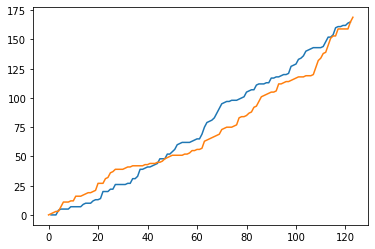

In [15]:
# we now combine the runs scored profile for Mumbai with Chennai's

plt.plot(MI_CSK['CSK_delivery_no'],MI_CSK['MI_runs_total_end'],MI_CSK['CSK_runs_total_end'])

We can see that Chennai's innings (in orange) progressed rather differently. Initially Chennai were well ahead of the pace set by Mumbai. However, Chennai slowed down considerably after about 25 deliveries, and were well behind Mumbai's scoring rate by mid-innings. Only at the end did Chennai accelerate, and overtake Mumbai's score to win the game.

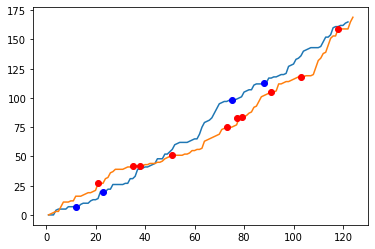

In [16]:
# We now plot the fall of wickets on the chart

plt.plot(MI_CSK['CSK_delivery_no'],MI_CSK['MI_runs_total_end'],MIwicket['MI_runs_total_end'], 'bo')
plt.plot(MI_CSK['CSK_delivery_no'],MI_CSK['CSK_runs_total_end'],CSKwicket['CSK_runs_total_end'], 'ro')

Now we can see why Chennai fell behind after the initial good start. Unlike Mumbai, Chennai's wickets fell steadily throughout the innings, a fact which tended to slow down the scoring rate. In fact, Chennai had lost eight wickets before its final accleration around the 100 delivery mark. In cricketing terms this was a fairly exceptional performance, for it is unusual for teams that have already lost eight wickets to score many runs, let alone outperform outpace the rest of the innings to this extent.

This analysis was for just one game. We now write a program which will allow us to reproduce these profiles for any game in IPL 2018 season, and compare profiles for any pair of games.

We now load a dataframe that includes every delivery for the season:

In [17]:
IPLbyb = pd.read_excel('D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week3\\IPLbyb.xlsx')
print(IPLbyb.columns.tolist())

['home team', 'batting_team', 'bowling_team', 'gameno', 'innings_number', 'over_no', 'ball_no', 'runs_total_end', 'delivery_no', 'delno^2', 'runs*wkts', 'wicket', 'wkts_total_end']


We are now going to define two functions: one that will allow to create a comparable chart for any game, and another that will allow us to specify two games to compare.

We will encounter functions again, but for Python novices these take a while to become accustomed to. Rather than explain in detail here, we'll just run the functions to show what can be done.

In [18]:
# First, the function for plotting the runs and wickets for each team in a game.

def plot_runs_wickets(IPLbyb, ax):
    gameno = IPLbyb['gameno'].unique()[0]
    for inning, data in IPLbyb.groupby('innings_number'):
        # create separate dataframe for wickets
        wicket = data[data['wicket'] > 0]
        # plots line
        ax.plot(data['delivery_no'],data['runs_total_end'])
        # plots markers
        marker = 'bo' if inning == 1 else 'ro'
        ax.plot(wicket['delivery_no'],wicket['runs_total_end'], marker)
        # labels
        ax.set_xlabel('balls')
        ax.set_ylabel('runs')
        ax.set_title(f'Game {gameno}')
    ax.legend(['runs1','wkt1','runs2','wkt2'])

In [19]:
# Second, a function that allows us to plot two or more games at the same time. 

def plot_runs_wickets_multi_game(list_games):
    n = len(list_games)
    fig, axs = plt.subplots(n, 1, figsize=(6,15))
    for i, gameno in enumerate(list_games):
        game = IPLbyb[IPLbyb['gameno'] == gameno]
        plot_runs_wickets(game, axs[i] if n > 1 else axs)

These functions will allow us to produce mutliple charts in order to display games alongside each other. Before we do that, though, we should generate a list of games, so we can decide which game's number refer to which teams. The code below generates a list for us. In our chart we'll see innings1 and innings2 as before. The next three lines of code creates a table which specifies the home team, the away team and and whether the home team batted first, so that the teams 1 and 2 can be identified for any game.

In [20]:
# Identify if the home team batted first

IPLbyb['hometeambatsfirst']= np.where((IPLbyb['home team']==IPLbyb['batting_team']) & (IPLbyb['innings_number']==1),'yes','no')
IPLbyb

,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,1,0,1,1,0,0,0,yes
1,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,2,0,2,4,0,0,0,yes
2,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,3,0,3,9,0,0,0,yes
3,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,4,4,4,16,0,0,0,yes
4,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,5,5,5,25,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14281,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,5,177,110,12100,354,0,2,no
14282,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,6,177,111,12321,354,0,2,no
14283,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,1,177,112,12544,354,0,2,no
14284,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,2,177,113,12769,354,0,2,no


In [21]:
# drop duplicates so we just have a list of games

games = IPLbyb.drop_duplicates('gameno')

In [22]:
# generate list of games

games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games

,gameno,home team,road team,hometeambatsfirst
0,1,Mumbai Indians,Chennai Super Kings,yes
246,2,Kings XI Punjab,Delhi Daredevils,no
484,3,Kolkata Knight Riders,Royal Challengers Bangalore,no
728,4,Sunrisers,Rajasthan Royals,no
953,5,Chennai Super Kings,Kolkata Knight Riders,no
1199,6,Rajasthan Royals,Delhi Daredevils,yes
1345,7,Sunrisers,Mumbai Indians,no
1590,8,Royal Challengers Bangalore,Kings XI Punjab,no
1827,9,Mumbai Indians,Delhi Daredevils,yes
2073,10,Kolkata Knight Riders,Sunrisers,yes


You can see from the list above that game 27 was the return game between MI and CSK, with CSK the home team and batting first. So let's compare these two games. 

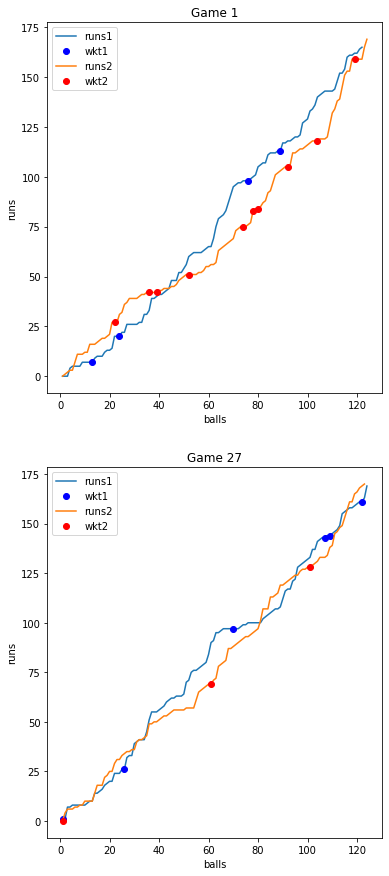

In [23]:
# Inside the square brackets we can type in game numbers, separated by a comma, to specify the games we want to compare

plot_runs_wickets_multi_game([1, 27])

As with game 1, the team batting second won the game, but this time is was the Mumbai Indians that won. Apart from the middle portion of the game, the scoring rates of each team were much closer, and the main difference was that toward the end of innings 1 (CSK) three wickets fell quickly, which slowed down the scoring rate. 

## Self test

Pick another pair of games between the same teams and compare scoring rates. 

# Conclusion

In this notebook we have shown how a particular kind of visualization can help to understand the performance of teams in cricket.

Looking at these charts, you start to think about ways to explain outcomes. For example, it seems clear that the rate at which runs are scored is a function of the number of wickets that have fallen, and that the fall of a wicket generally slows the run rate. Likewise, winning teams seem to enjoy periods of rapid acceleration. These observations should lead you to formulate stories (hypotheses) which can be tested more formally. In that sense, visualizing the data is a stepping stone to a more rigorous statistical analysis. 

The Nobel prize winning economist Sir John Hicks once said that he was never convinced of a theory until he could formalize it in an equation, write it down in plain English and draw a picture. Much the same thing is true for data analytics. However, whereas Hicks worked in an age where only limited amounts of data could be analyzed, and so often the picture was an afterthought, we now have the opportunity to start our analysis by drawing pictures which can sometimes show us clearly what the story is to be told. 